# Computational Assignment 2: The Trebuchet

Trine B. Sæther

Ida A. Holsæter

Edvard S. Jortveit

## Task 1

To find the velocities of the projectile and counterweight, we need to derivate the vectors $r_1$ and $r_{2b}$ with respect to time. When we do so, we can see that 

$v_1^2$ = $l_1^2 cos^2(\theta)  \theta^2 + l_1^2  sin^2(\theta)  \theta^2$ 

$v_2^2$ = $l_2^2 cos^2(\dot{\theta}) \theta^2 + l_4^2 cos^2(\psi - \theta)(\dot{\psi} - \dot{\theta})^2 + l_2^2 sin^2(\theta) \dot{\theta^2} + l_4^2 sin^2(\psi - \theta)(\dot{\psi} - \dot{\theta})^2$

$ + 2l_4l_2\dot{\theta}(\dot{\psi} - \dot{\theta})cos({\theta})cos({\psi} - {\theta}) - 2l_4l_2\dot{\theta}(\dot{\psi} - \dot{\theta})sin({\theta})sin({\psi} - {\theta})$

which we shoten to 

$v_1^2 = l_1^2\theta^2$

$v_2^2 = l_2^2\dot{\theta^2} + l_4^2(\dot{\psi} - \dot{\theta})^2 + 2l_4l_2\dot{\theta}(\dot{\psi} - \dot{\theta})cos({\theta})cos({\psi} - {\theta}) - 2l_4l_2\dot{\theta}(\dot{\psi} - \dot{\theta})sin({\theta})sin({\psi} - {\theta})$

To find the Lagrangian, we look at the projectile and the counterweights individual contribution to kinetic and potential energy.

$T_1$ = $\frac{1}{2}  m_1 v_1^2$

$T_2$ = $\frac{1}{2} m_2 v_2^2$

$V_1$ = $m_1gh_1 = m_1g(-l_1cos(\theta) + l_3)$

$V_2$ = $m_2gh_2 = m_2g(l_2cos(\theta) + l_3 - l_4 cos(\psi - \theta))$

The Lagrangian then becomes 

$L = T_1 + T_2 - V_1 - V_2$

$L = \frac{1}{2}(m_1l_1^2 + m_2l_2^2)\dot{\theta}^2 - gl_3(m_1 + m_2) + g(m_1l_1 - m_2l_2)cos(\theta) $

$+ \frac{1}{2} m_2 l_4^2 (\dot{\psi} - \dot{\theta})^2 + m_2l_2l_4\dot{\theta}  (\dot{\psi} - \dot{\theta}) cos(\psi)  + gm_2l_4cos(\psi - \theta)$


To solve 

$\frac{\partial L}{\partial \theta} - \frac{\partial}{\partial t} \big (\frac{\partial L}{\partial \dot{\theta}} \big ) = 0$

we have for $\theta$

$\frac{\partial L}{\partial \theta} = -sin(\theta)g(m_1l_1 - m_2l_2) + sin(\psi - \theta)gm_2l_4$

$\frac{\partial }{\partial t}\big (\frac{\partial L}{\partial \dot{\theta}}\big ) = \ddot{\theta} (m_1l_1^2 + m_2l_2^2) - m_2l_4^2\ddot{\psi} + m_2l_4^2 \ddot{\theta} + m_2l_2l_4\ddot{\psi}cos(\psi) - m_2l_2l_4\dot{\psi}^2 sin(\psi) - 2m_2l_2l_4\ddot{\theta}cos(\psi) - m_2l_2l_4\dot{\theta} sin(\dot{\psi}-2\dot{\theta})\dot{\psi}$

For $\psi$ we have 

$ \frac{\partial L}{\partial \psi} = -m_2l_2l_4\dot{\theta} sin(\psi) (\dot{\psi} - \dot{\theta}) - sin(\psi - \theta) gm_2l_4 \dot{\psi}$

$ \frac{\partial L}{\partial \dot{\psi}} = m_2l_4^2\dot{\psi} - m_2l_4^2\dot{\theta} +m_2l_2l_4\dot{\theta} cos(\psi)   $

$ \frac{\partial}{\partial t}\big( \frac{\partial L}{\partial \dot{\psi}} \big) = -sin(\psi)\dot{\theta} \dot{\psi} -  l_4m_2\ddot{\theta} (l_2cos(\psi) -l_4) - \ddot{\psi}l_4^2m_2$

## Task 2

Here we implement the Runge-Kutta 4th order algorithm to solve the equations of motions for the trebutchet.

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initial Conditions

m1 = 2000
m2 = 15
l1 = 1.2
l2 = 5.7
l3 = 3.2
l4 = 5
g = 9.81
theta0 = 0.7*np.pi # rad
thetadot0 = 0 # rad/s
phi0 = 0.2*np.pi # rad
phidot0 = 0 # rad/s

In [ ]:
# Defining a function F that evaluates y' for a given y 
# Here F_vec is the vector that will contain the values for x, y, v_x, v_y.
# y is the vector with the given values of x, y, v_x, v_y.

def F(y, F_vec):

    # Elements of the A matrix
    a11 = -l1**2*m1 - l2**2*m2 + 2*l2*l4*m2*np.cos(y[1]) - l4**2*m2
    a12 = -l4*m2*(l2*np.cos(y[1])-l4)
    a22 = -l4**2*m2
    
    # Multiplying factor from taking the inverse of the A matrix
    detFactor = 1/(a11*a22-a12**2)
    
    # Elements of the B matrix
    b1 = g*m1*l1*np.sin(y[0]) - g*m2*(l2*np.sin(y[0]) + l4*np.sin(y[1]-y[0])) - l2*l4*m2*(y[3]-2*y[2])*np.sin(y[1])*y[3]
    b2 = l4*m2*(g*np.sin(y[1]-y[0])-l2*np.sin(y[1])*y[2]**2)
        

    F_vec[0] = y[2]
    F_vec[1] = y[3]

    # The inverse of A times B to find thetadot and phidot
    F_vec[2] = detFactor*(a22*b1-a12*b2) 
    F_vec[3] = detFactor*(-a12*b1+a11*b2)

In [ ]:
# Defining a function that solves differential equations using Kuttas' method. 

def RK4(y0, h, T, release_angle, k):

    # Creating an empty 1x4 array for the solutions. 
    y_vec = np.empty((1, 4)) 

    # Setting the first elements to be equal to the initial values given.
    y_vec[0,:] = y0 

    # Creating an empty array F_vec for evaluations. 
    F_vec = np.zeros((4,4)) 

    # Sets initial value for i. 
    if k == "TimeIsSet":
        
        t = np.arange(0, T, h)
        for i in range(len(t)-1): 

            y_vec = np.append(y_vec, np.zeros((1,4)), axis = 0) # Appends new row for new values. 

            # Implementation of the method as given from the equations in the project description.
            F(y_vec[i,:], F_vec[:,0]) 
            F(y_vec[i,:]+(1/2)*h*F_vec[:,0], F_vec[:,1])
            F(y_vec[i,:]+(1/2)*h*F_vec[:,1], F_vec[:, 2])
            F(y_vec[i,:]+h*F_vec[:,2], F_vec[:,3])

            # Adds the new values. 
            y_vec[i+1,:] = y_vec[i,:] + h*((1/6)*F_vec[:,0]+(1/3)*F_vec[:,1]+(1/3)*F_vec[:,2]+(1/6)*F_vec[:,3])
            
            
          # Next step. 
        return t, y_vec
        
    elif k == "UntilRelease":
        
        i = 0
        while y_vec[i, 0] > release_angle:
            y_vec = np.append(y_vec, np.zeros((1,4)), axis = 0) # Appends new row for new values. 

            # Implementation of the method as given from the equations in the project description.
            F(y_vec[i,:], F_vec[:,0]) 
            F(y_vec[i,:]+(1/2)*h*F_vec[:,0], F_vec[:,1])
            F(y_vec[i,:]+(1/2)*h*F_vec[:,1], F_vec[:, 2])
            F(y_vec[i,:]+h*F_vec[:,2], F_vec[:,3])

            # Adds the new values. 
            y_vec[i+1,:] = y_vec[i,:] + h*((1/6)*F_vec[:,0]+(1/3)*F_vec[:,1]+(1/3)*F_vec[:,2]+(1/6)*F_vec[:,3])
          # Next step.
            i += 1 

            
            
        t = np.arange(0, (i+1)*h, h)
            
        return t, y_vec

In [ ]:
y0 = [theta0, phi0, thetadot0, phidot0]

In [ ]:

t1, y_vec1 = RK4(y0, 0.1, 1, np.pi, "TimeIsSet")
t5, y_vec5 = RK4(y0, 0.1, 5, np.pi, "TimeIsSet")
t10, y_vec10 = RK4(y0, 0.1, 10, np.pi, "TimeIsSet")

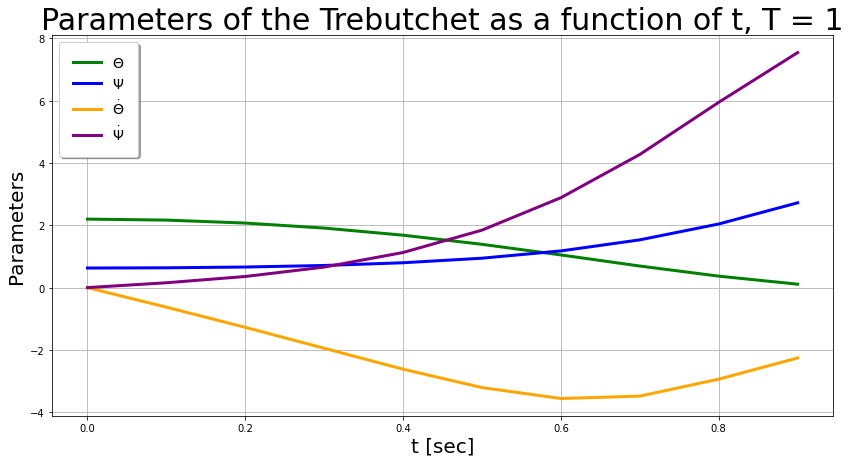

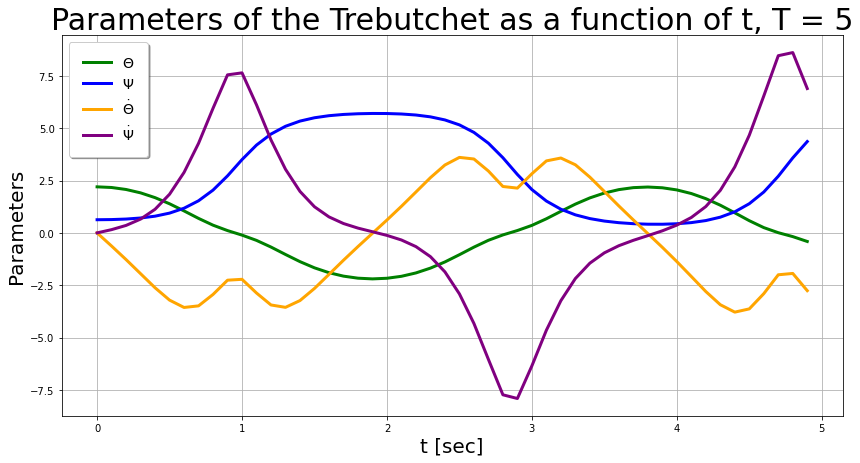

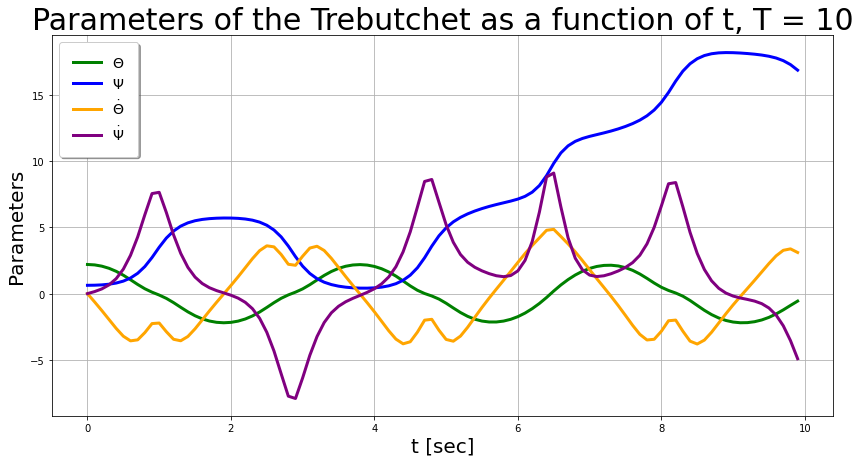

In [ ]:
    
plt.figure(figsize=(14,7))
plt.title("Parameters of the Trebutchet as a function of t, T = 1", size = 30)
plt.plot(t1, y_vec1[:,0], color = 'Green', linewidth = 3, label = "${\Theta}$")
plt.plot(t1, y_vec1[:,1], color = 'Blue', linewidth = 3, label = "${\Psi}$")
plt.plot(t1, y_vec1[:,2], color = 'Orange', linewidth = 3, label = "${\dot\Theta}$")
plt.plot(t1, y_vec1[:,3], color = 'Purple', linewidth = 3, label = "${\dot\Psi}$")
plt.grid()
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 14})
plt.ylabel('Parameters', size = 20)
plt.xlabel('t [sec]', size = 20)
plt.show()

plt.figure(figsize=(14,7))
plt.title("Parameters of the Trebutchet as a function of t, T = 5", size = 30)
plt.plot(t5, y_vec5[:,0], color = 'Green', linewidth = 3, label = "${\Theta}$")
plt.plot(t5, y_vec5[:,1], color = 'Blue', linewidth = 3, label = "${\Psi}$")
plt.plot(t5, y_vec5[:,2], color = 'Orange', linewidth = 3, label = "${\dot\Theta}$")
plt.plot(t5, y_vec5[:,3], color = 'Purple', linewidth = 3, label = "${\dot\Psi}$")
plt.grid()
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 14})
plt.ylabel('Parameters', size = 20)
plt.xlabel('t [sec]', size = 20)
plt.show()

plt.figure(figsize=(14,7))
plt.title("Parameters of the Trebutchet as a function of t, T = 10", size = 30)
plt.plot(t10, y_vec10[:,0], color = 'Green', linewidth = 3, label = "${\Theta}$")
plt.plot(t10, y_vec10[:,1], color = 'Blue', linewidth = 3, label = "${\Psi}$")
plt.plot(t10, y_vec10[:,2], color = 'Orange', linewidth = 3, label = "${\dot\Theta}$")
plt.plot(t10, y_vec10[:,3], color = 'Purple', linewidth = 3, label = "${\dot\Psi}$")
plt.grid()
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 14})
plt.ylabel("Parameters", size = 20)
plt.xlabel('t [sec]', size = 20)
plt.show()

The function of the parameters seems to be parametic for the time interval T = 5, but looking at the the plot for the time interval T = 10 we observe that ${\psi}$ only increases with time and that, corrspondingly, ${\dot\psi}$ becomes only positive for some time. 

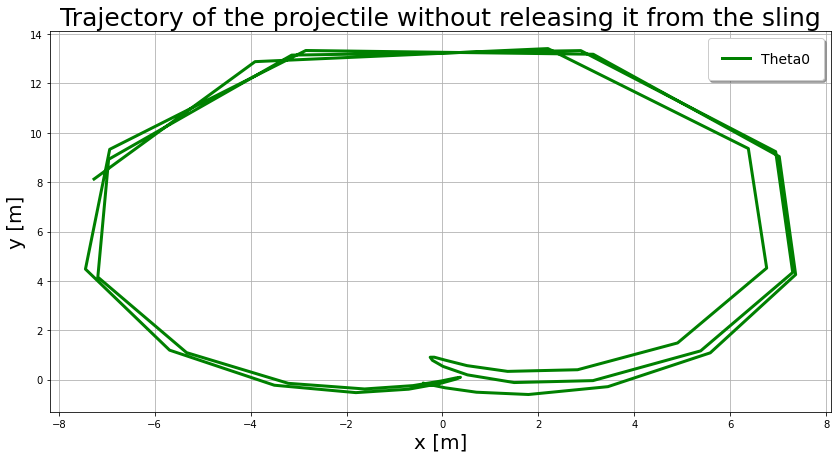

In [ ]:
## Plot the tracjectory of the projectile without releasing it

t5, y_vec5 = RK4(y0, 0.1, 5, np.pi, "TimeIsSet")
y = np.zeros(len(y_vec5[:,0]))
x_behind_l3 = np.zeros(len(y_vec5[:,0]))
for i in range(len(y)):

    y[i] = (l4*np.sin(y_vec5[i,1]-y_vec5[i,0]-np.pi/2)+(l3-l2*np.cos(np.pi-y_vec5[i,0])))
    x_behind_l3[i] = l4*np.cos(y_vec5[i,1]-y_vec5[i,0]-np.pi/2)+l2*np.sin(np.pi-y_vec5[i,0])


plt.figure(figsize=(14,7))
plt.title("Trajectory of the projectile without releasing it from the sling", size = 25)
plt.plot(x_behind_l3, y, color = 'Green', linewidth = 3, label = "Theta0")
plt.grid()
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 14})
plt.ylabel('y [m]', size = 20)
plt.xlabel('x [m]', size = 20)
plt.show()


Here we have plotted the trajectory of the projectile when it is not released from the sling for several seconds. This corresponds with the plot of the parameters ${\psi}$ and ${\dot\psi}$ over time, above. We see that first the projectile starts by circling around the axis of rotation for the projectile for about 2/3 of a round, and then it circles the other way for several rounds. This corresponds with ${\psi}$ first being periodic and then only increasing steadily.

## Task 3

In [ ]:
# Defining a function F that evaluates y' with a given y 
# Here F_vec is the vector that will contain the values for x, y, v_x, v_y.
# y is the vector with the given values of x, y, v_x, v_y.

def F_trajectory(y,F_vec): # Allows us to change up the rho functions we want to use. 
    
    # Below, each value is updated. 
    F_vec[0] = y[2] # x' = v_x
    F_vec[1] = y[3] # y' = v_y
    F_vec[2] = 0 # v_x' = 0
    F_vec[3] = -g # v_y' = -g

In [ ]:
# Defining a function that solves differential equations using Kuttas' method. 

def RK4_trajectory(y0, h):
    # h is the timestep.

    # Creating an empty 1x4 array for the solutions. 
    y_vec = np.empty((1, 4)) 

    # Setting the first elements to be equal to the initial values given.
    y_vec[0,:] = y0 

    # Creating an empty array F_vec for evaluations. 
    F_vec = np.zeros((4,4)) 

    i = 0 # Sets initial value for i. 
    while (y_vec[i, 1] >= 0): # As long as y >= 0, the while-loop will run, adding new values to the array.

        y_vec = np.append(y_vec, np.zeros((1,4)), axis = 0) # Appends new row for new values. 
    
        # Implementation of the method as given from the equations in the project description.
        F_trajectory(y_vec[i,:], F_vec[:,0]) 
        F_trajectory(y_vec[i,:]+(1/2)*h*F_vec[:,0], F_vec[:,1])
        F_trajectory(y_vec[i,:]+(1/2)*h*F_vec[:,1], F_vec[:, 2])
        F_trajectory(y_vec[i,:]+h*F_vec[:,2], F_vec[:,3])
        
        # Adds the new values. 
        y_vec[i+1,:] = y_vec[i,:] + h*((1/6)*F_vec[:,0]+(1/3)*F_vec[:,1]+(1/3)*F_vec[:,2]+(1/6)*F_vec[:,3])
        i += 1 # Next step. 
    

    r = -(y_vec[i-1, 1]/y_vec[i, 1]) # Interpolation coeficcient.
    x_l = (y_vec[i-1, 0] + r*y_vec[i, 0])/(r+1) # Predicted range in x-direction. 
    
    t = np.arange(0, (i+1)*h, h)
    
    return t, y_vec, x_l


In [ ]:
t, y_vec = RK4(y0, 0.01, 10, 0.1*np.pi,"UntilRelease")

theta = y_vec[-1, 0]
phi = y_vec[-1, 1]
thetadot = y_vec[-1, 2]
phidot = y_vec[-1, 3]

firing_angle = phi-np.pi/2-theta

v = np.sqrt((l2*thetadot)**2
         +(l4*(phidot-thetadot))**2
         +2*l2*l4*thetadot*np.cos(theta)*np.cos(phi-theta)*(phidot-thetadot)
         -2*l2*l4*thetadot*np.sin(theta)*np.sin(phi-theta)*(phidot-thetadot))

y = (l4*np.sin(phi-theta-np.pi/2)+(l3-l2*np.cos(np.pi-theta)))
x_behind_l3 = l4*np.cos(phi-theta-np.pi/2)+l2*np.sin(np.pi-theta)

y_traj = [-x_behind_l3, y, v*np.cos(firing_angle), v*np.sin(firing_angle)]

t_traj, y_vec_traj, x_l = RK4_trajectory(y_traj, 0.01)

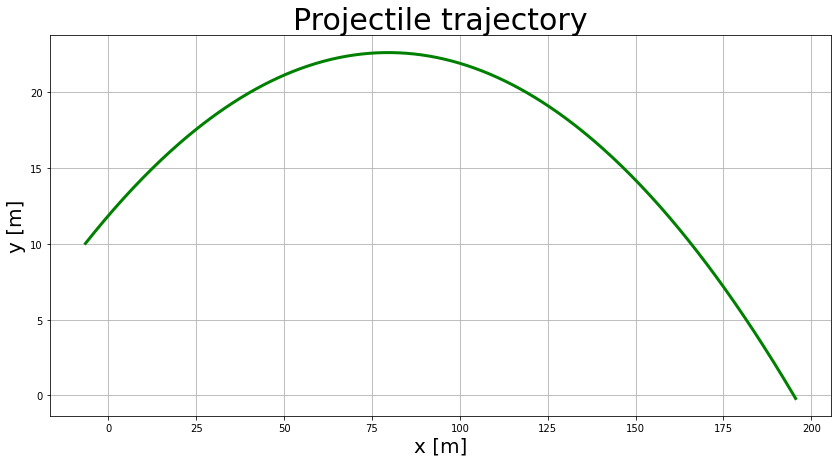

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Projectile trajectory", size = 30)
plt.plot(y_vec_traj[:,0], y_vec_traj[:,1],  color = 'Green', linewidth = 3)
plt.grid()
plt.ylabel('y [m]', size = 20)
plt.xlabel('x [m]', size = 20)
plt.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/shared-libs/python3.7/py-core/l

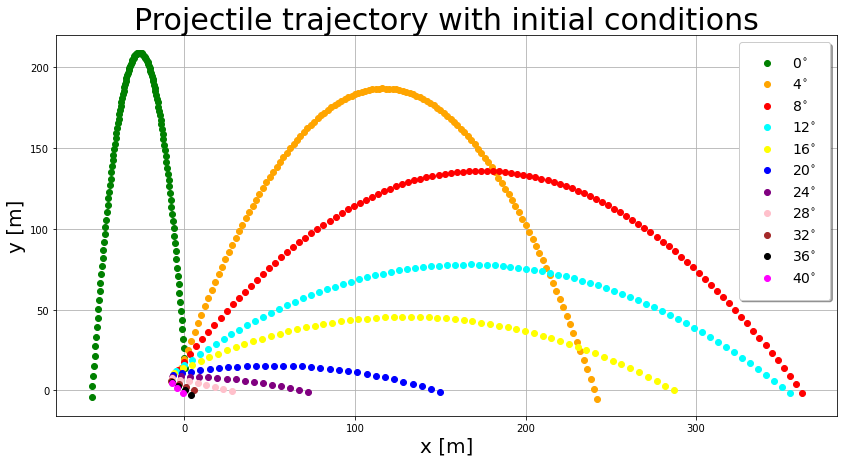

In [ ]:
release_angles = np.linspace(0, 40/180*np.pi, 11)
color_list = ["Green", "Orange", "Red", "Cyan", "Yellow", "blue", "purple", "pink", "brown", "black", "magenta"]
label_list = ["0", "4", "8", "12", "16", "20", "24", "28", "32", "36", "40"]

y0 = [theta0, phi0, thetadot0, phidot0]
plt.figure(figsize=(14,7))
plt.title("Projectile trajectory with initial conditions", size = 30)

for i in range(len(release_angles)):
    
    t, y_vec = RK4(y0, 0.01, 10, release_angles[i], "UntilRelease")
    
    theta = y_vec[-1, 0]
    phi = y_vec[-1, 1]
    thetadot = y_vec[-1, 2]
    phidot = y_vec[-1, 3]

    firing_angle = phi-np.pi/2-theta

    v = np.sqrt((l2*thetadot)**2
         +(l4*(phidot-thetadot))**2
         +2*l2*l4*thetadot*np.cos(theta)*np.cos(phi-theta)*(phidot-thetadot)
         -2*l2*l4*thetadot*np.sin(theta)*np.sin(phi-theta)*(phidot-thetadot))
    
    y = (l4*np.sin(phi-theta-np.pi/2)+(l3-l2*np.cos(np.pi-theta)))
    x_behind_l3 = l4*np.cos(phi-theta-np.pi/2)+l2*np.sin(np.pi-theta)

    y_traj = [-x_behind_l3, y, v*np.cos(firing_angle), v*np.sin(firing_angle)]
    t, y_vec_traj, x_l = RK4_trajectory(y_traj, 0.1)
    plt.plot(y_vec_traj[:,0], y_vec_traj[:,1], "ro", color = color_list[i], linewidth = 3, label = f"{label_list[i]}" + "$^{\circ}$")
    
plt.grid()

plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 14})
plt.ylabel('y [m]', size = 20)
plt.xlabel('x [m]', size = 20)
plt.show()
    

We see that, for the initial conditions, the projectile starts to go in the positive x-direction already after the release angle reaches 4 degrees.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
/shared-libs/python3.7/py-core/l

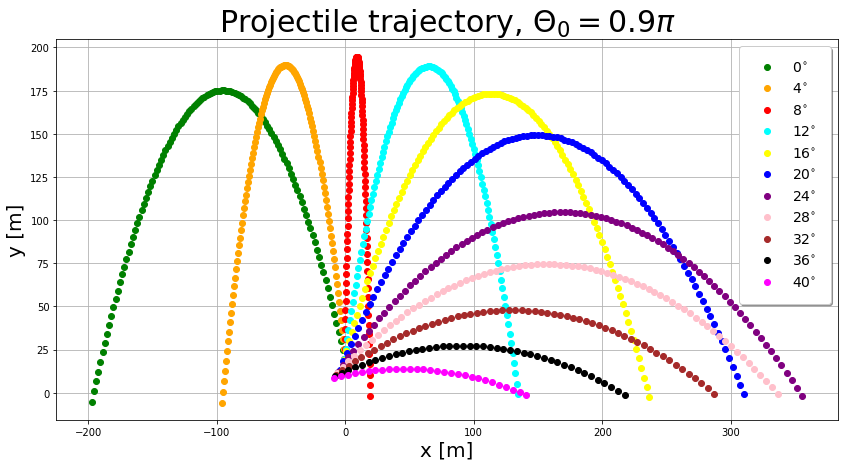

In [ ]:
## We then change the initial conditions so that theta0 = 0.9*pi

release_angles = np.linspace(0, 40/180*np.pi, 11)
color_list = ["Green", "Orange", "Red", "Cyan", "Yellow", "blue", "purple", "pink", "brown", "black", "magenta"]
label_list = ["0", "4", "8", "12", "16", "20", "24", "28", "32", "36", "40"]

y0 = [0.9*np.pi, 0.9*np.pi-0.5*np.pi, thetadot0, phidot0]
plt.figure(figsize=(14,7))
plt.title("Projectile trajectory, ${\Theta_0} = 0.9{\pi}$", size = 30)

for i in range(len(release_angles)):
    
    t, y_vec = RK4(y0, 0.01, 10, release_angles[i], "UntilRelease")
    
    theta = y_vec[-1, 0]
    phi = y_vec[-1, 1]
    thetadot = y_vec[-1, 2]
    phidot = y_vec[-1, 3]

    firing_angle = phi-np.pi/2-theta

    v = np.sqrt((l2*thetadot)**2
         +(l4*(phidot-thetadot))**2
         +2*l2*l4*thetadot*np.cos(theta)*np.cos(phi-theta)*(phidot-thetadot)
         -2*l2*l4*thetadot*np.sin(theta)*np.sin(phi-theta)*(phidot-thetadot))
    
    y = (l4*np.sin(phi-theta-np.pi/2)+(l3-l2*np.cos(np.pi-theta)))
    x_behind_l3 = l4*np.cos(phi-theta-np.pi/2)+l2*np.sin(np.pi-theta)

    y_traj = [-x_behind_l3, y, v*np.cos(firing_angle), v*np.sin(firing_angle)]
    t, y_vec_traj, x_l = RK4_trajectory(y_traj, 0.1)
    plt.plot(y_vec_traj[:,0], y_vec_traj[:,1], "ro", color = color_list[i], linewidth = 3, label = f"{label_list[i]}" + "$^{\circ}$")
    
plt.grid()
#plt.figtext(0.12, 0.01, "Figure 1: Trajectory for different air density models." , fontsize = 15)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 14})
plt.ylabel('y [m]', size = 20)
plt.xlabel('x [m]', size = 20)
plt.show()

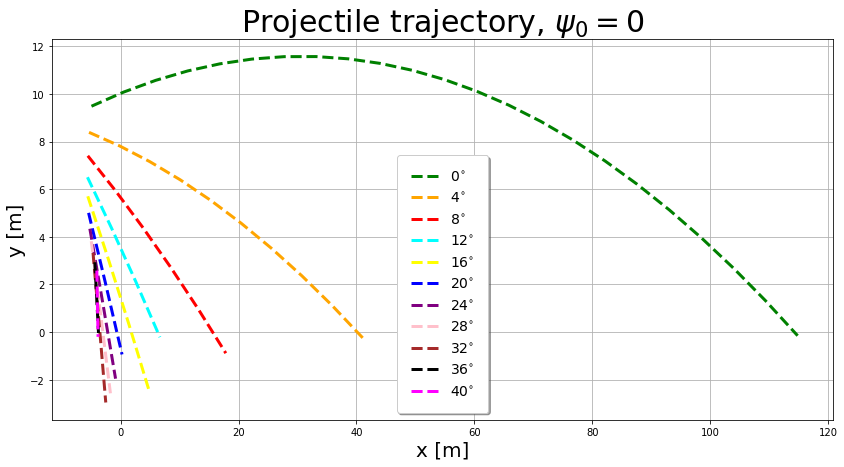

In [ ]:
release_angles = np.linspace(0, 40/180*np.pi, 11)
color_list = ["Green", "Orange", "Red", "Cyan", "Yellow", "blue", "purple", "pink", "brown", "black", "magenta"]
label_list = ["0", "4", "8", "12", "16", "20", "24", "28", "32", "36", "40"]

y0 = [0.7*np.pi, 0, thetadot0, phidot0]
plt.figure(figsize=(14,7))
plt.title("Projectile trajectory, ${\psi_0} = 0$", size = 30)

for i in range(len(release_angles)):
    
    t, y_vec = RK4(y0, 0.001, 10, release_angles[i], "UntilRelease")
    
    theta = y_vec[-1, 0]
    phi = y_vec[-1, 1]
    thetadot = y_vec[-1, 2]
    phidot = y_vec[-1, 3]

    firing_angle = phi-np.pi/2-theta

    v = np.sqrt((l2*thetadot)**2
         +(l4*(phidot-thetadot))**2
         +2*l2*l4*thetadot*np.cos(theta)*np.cos(phi-theta)*(phidot-thetadot)
         -2*l2*l4*thetadot*np.sin(theta)*np.sin(phi-theta)*(phidot-thetadot))
    
    y = (l4*np.sin(phi-theta-np.pi/2)+(l3-l2*np.cos(np.pi-theta)))
    x_behind_l3 = l4*np.cos(phi-theta-np.pi/2)+l2*np.sin(np.pi-theta)

    y_traj = [-x_behind_l3, y, v*np.cos(firing_angle), v*np.sin(firing_angle)]
    t, y_vec_traj, x_l = RK4_trajectory(y_traj, 0.1)
    plt.plot(y_vec_traj[:,0], y_vec_traj[:,1], "--", color = color_list[i], linewidth = 3, label = f"{label_list[i]}" + "$^{\circ}$")
    
plt.grid()
#plt.figtext(0.12, 0.01, "Figure 1: Trajectory for different release angles between 0 and 40 degrees, phi0 = 0" , fontsize = 15)#
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 14})
plt.ylabel('y [m]', size = 20)
plt.xlabel('x [m]', size = 20)
plt.show()



When we change the initial conditions to $\theta_0$ = 0.9 $\pi$ and $\psi_0$ = 0 in the two plots above we see significant change in the trajectory of the projectile. Considering first the plot where $\theta_0$ = 0.9 $\pi$  we see that the projectile moves in the negative x direction for a larger range of release angles. $\theta_0$ = 0.9 $\pi$  means that counterweight starts at a higher point before it is released. The firing angle is given by $\sin$($\theta$-$\psi$ -$\pi$/2). Therefore if we plotted the parameters $\theta$ and $\psi$ against eachother we would see that $\theta$-$\psi$ -$\pi$/2 is negative for a larger range of release angles, than the initial conditions in the first plot, and therefore fires in the negative x-direction for a larger range of release angles. Then considering the second plot, where $\psi_0$ = 0, we see that the projectile moves in the positive x-direction for all release angle, this should then be because the firing angle has a lower tendency to be negative, and beacause of that does not fire in the negative direction.

## Task 4

In this task we plot the impact energy and the range of the projectile as a function of release angles.

In [ ]:
release_angles = np.linspace(-40/180*np.pi, 40/180*np.pi, 100)
impact_energy = np.zeros(100)
x = np.zeros(100)

y0 = [theta0, phi0, thetadot0, phidot0]

In [ ]:


for i in range(len(release_angles)):
    
    t, y_vec = RK4(y0, 0.001, 10, release_angles[i], "UntilRelease")
    
    theta = y_vec[-1, 0]
    phi = y_vec[-1, 1]
    thetadot = y_vec[-1, 2]
    phidot = y_vec[-1, 3]

    firing_angle = phi-np.pi/2-theta

    v = np.sqrt((l2*thetadot)**2
         +(l4*(phidot-thetadot))**2
         +2*l2*thetadot*l4*np.cos(theta)*np.cos(phi-theta)*(phidot-thetadot)
         -2*l2*l4*thetadot*np.sin(theta)*np.sin(phi-theta)*(phidot-thetadot))

    
    h = (l4*np.sin(phi-theta-np.pi/2)+(l3-l2*np.cos(np.pi-theta)))
    x_behind_l3 = l4*np.cos(phi-theta-np.pi/2)+l2*np.sin(np.pi-theta)

    impact_energy[i] = (1/2)*m2*v**2 + m2*g*h

    y_traj = [-x_behind_l3, h, v*np.cos(firing_angle), v*np.sin(firing_angle)]
    t, y_vec_traj, x_l = RK4_trajectory(y_traj, 0.001)

    x[i] = x_l-x_behind_l3
    

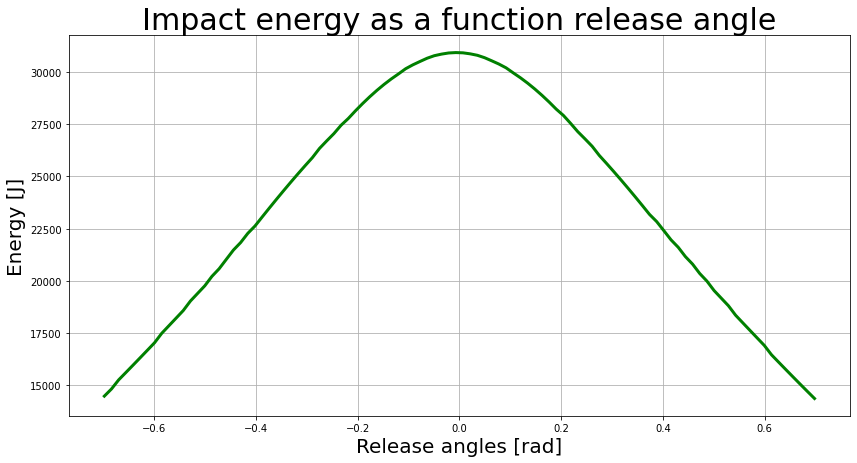

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Impact energy as a function release angle", size = 30)
plt.plot(release_angles, impact_energy, color = 'Green', linewidth = 3)
plt.grid()
plt.ylabel('Energy [J]', size = 20)
plt.xlabel('Release angles [rad]', size = 20)
plt.show()


From the plot above, we see that the impact energy has an extrema at ${\Theta} = 0$ radians. When ${\Theta} = 0$ radians the trebuchet arm is vertical and the projectile has therefore maximum potential energy (depending on ${\psi}$). The energy is also dependent on the kinetic energy, but by just looking at the potential energy this would make sense. 

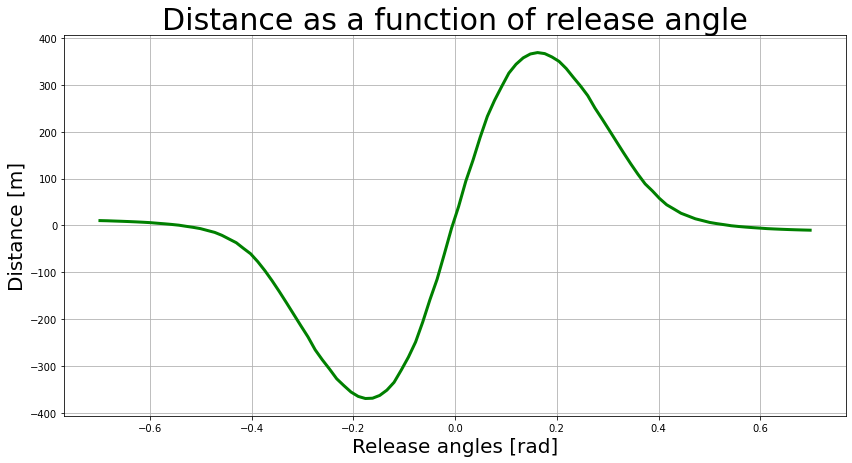

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Distance as a function of release angle", size = 30)
plt.plot(release_angles, x, color = 'Green', linewidth = 3)
plt.grid()
plt.ylabel('Distance [m]', size = 20)
plt.xlabel('Release angles [rad]', size = 20)
plt.show()


Above we see that the distance as a function of release angle has two extrema, one for negative and positive release angles. These deviate from the release angle that gives the largest impact energy, which do make sense, because a large energy does not necessarily correspond to a large distance for the projectile. The distance the projectile travels also depends on the angle it is fired from, as well as a as large energy as possible with this angle.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=564f0c37-91c9-42e4-a395-3e320af970c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>